# Python 프로그래밍 Pandas
## 데이터프레임 Dataframe

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

## Pandas
- DataFrame이 무엇인지 이해한다.
- csv파일, 엑셀파일, DB의데이터를 가져오고 다시 저장해본다
- 탐색적분석을 수행해 본다
- 필요한 데이터를 선택해 가져온다
- 변수를 만들어 Dataframe에 추가하고 삭제한다
- DataFrame을 서로 연결한다

## Pandas 란
- 다른 Dataframe이나 고차원 객체로부터 컬럼을 추가 삭제
- group by함수
- 라벨 등을 이용한 데이터 부분 집합 추출
- 데이터 세로 가로 합치기
- 외부 데이터 연동의 견고함(CSV, Excel, databases, HDF5지원)
- missing data(NaN) 처리

https://pandas.pydata.org/pandas-docs/stable/

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
#os.chdir('d:/')
os.getcwd()
'**'.join(os.listdir('.'))

'D:\\my\\script'

'.ipynb_checkpoints**Faker.ipynb**JPype1-0.7.0-cp37-cp37m-win_amd64.whl**JPype1-0.7.0-cp38-cp38-win_amd64.whl**K-Stratified.ipynb**konlpy_test.ipynb**main.py**mod1.py**mod2.py**October.ipynb**PDP_SHAP_visualization.ipynb**plot_label_propagation_versus_svm_iris.ipynb**Python_basic.ipynb**Python_numpy.ipynb**Python_pandas_basic.ipynb**Python_pandas_groupby.ipynb**Python_pandas_part3.ipynb**submission_knn.csv**submission_rbf.csv**text-preprocessing-using-python.ipynb**text_1101.ipynb**Untitled.ipynb**Untitled1.ipynb**__pycache__'

In [4]:
data = pd.read_csv('../data/도로교통공단_교통사고다발지역_20191010.csv', encoding='euc-kr')

## 데이터 Select - query, sample

In [5]:
data.columns
data.head()

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자'],
      dtype='object')

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10
3,2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10
4,2013060,2012,스쿨존어린이,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,37.648129,127.024430,"{type:Polygon,coordinates:[[[127.0268336,37.65...",2019-10-10


## query에 의한 선택

In [300]:
data.query('사망자수 > 3')[[ '경상자수', '부상자수']]

,경상자수,부상자수
469,0,0
1392,2,0
3077,1,0
3249,2,1
4806,4,0
8125,1,0


In [305]:
data.sample(frac = 0.0005)
data.sample(n=2)

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
8884,2018032,2017,자전거,30170001,대전광역시 서구1,대전광역시 서구 둔산동(목련네거리 부근),7,7,0,1,5,1,36.349229,127.389813,"{type:Polygon,coordinates:[[[127.39160969,36.3...",2019-10-10
4319,2015048,2014,보행노인,30170001,대전광역시 서구1,대전광역시 서구 내동(안골네거리 부근),3,3,1,0,2,0,36.333104,127.373444,"{type:Polygon,coordinates:[[[127.3750195,36.33...",2019-10-10
8532,2018029,2017,보행노인,45130001,전라북도 군산시1,전라북도 군산시 미원동(흥남동주민센터 부근),7,7,1,2,3,1,35.978181,126.715648,"{type:Polygon,coordinates:[[[126.71744453,35.9...",2019-10-10
2002,2014105,2013,보행노인,27230001,대구광역시 북구1,대구광역시 북구 칠성동1가(칠성시장네거리 부근),5,5,0,3,2,0,35.876016,128.604306,"{type:Polygon,coordinates:[[[128.6058723,35.87...",2019-10-10
8571,2018029,2017,보행노인,46790001,전라남도 화순군1,전라남도 화순군 화순읍(경찰서사거리 부근),5,5,1,3,1,0,35.062092,126.984342,"{type:Polygon,coordinates:[[[126.98613852,35.0...",2019-10-10


,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
388,2013098,2012,보행노인,26230010,부산광역시 부산진구10,부산광역시 부산진구 부전동(서면교차로 부근),8,8,0,6,2,0,35.157722,129.058810,"{type:Polygon,coordinates:[[[129.0603625,35.15...",2019-10-10
7414,2017050,2016,자전거,11560004,서울특별시 영등포구4,서울특별시 영등포구 여의도동(서울방송(SBS) 부근),9,11,0,1,7,3,37.530723,126.927591,"{type:Polygon,coordinates:[[[126.92938747,37.5...",2019-10-10


## DataFrame 모양바꾸기 - 값 바꾸기

## 값 하나로 모든 row의 값 추가

In [323]:
data['기본']= 50
data.set_index('사고지역관리번호')
data.head(3)
data.set_index('사고지역관리번호', inplace=True)
data.head(3)

,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,기본
사고지역관리번호,,,,,,,,,,,,,,,,
2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,50
2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,50
2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,50
2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10,50
2013060,2012,스쿨존어린이,11320001,서울특별시 도봉구1,서울특별시 도봉구 쌍문동(쌍문초교 부근),2,2,0,0,2,0,37.648129,127.024430,"{type:Polygon,coordinates:[[[127.0268336,37.65...",2019-10-10,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019066,2018,무단횡단,280641002,경기 파주2,경기도 파주시 금촌동(우리은행 파주금융센터 부근),5,7,0,2,5,0,37.757022,126.773592,"{type:Polygon,coordinates:[[[126.77628656,37.7...",2019-10-10,50
2019066,2018,무단횡단,280641003,경기 파주3,경기도 파주시 조리읍(봉일천우체국 부근),5,5,0,2,3,0,37.743755,126.806671,"{type:Polygon,coordinates:[[[126.80936607,37.7...",2019-10-10,50
2019066,2018,무단횡단,280641004,경기 파주4,경기도 파주시 금촌동(금촌사거리 부근),4,4,0,2,2,0,37.763186,126.773463,"{type:Polygon,coordinates:[[[126.77615816,37.7...",2019-10-10,50


,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,기본
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,50
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,50
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,50


,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,기본
사고지역관리번호,,,,,,,,,,,,,,,,
2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,50
2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,50
2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,50


# <font color='red'>DataFrame 모양바꾸기 - column 변환/추가</font>

## 중복해서 값을 변경 - replace 두번 사용

In [328]:
data.사고유형구분.str.replace('스쿨', '').replace('종로', '종철이').value_counts()

보행노인     3919
자전거      3315
무단횡단     2006
보행어린이     852
존어린이      273
Name: 사고유형구분, dtype: int64

In [327]:
data.사고지역위치명.str.replace('서울', '').replace('종로', '종철이').head(3)
data.head(3)
data.사고지역위치명 = data.사고지역위치명.str.replace('서울', '').replace('종로', '종철이')
data.head(3)

사고지역관리번호
2013060       특별시 종로구 혜화동(혜화초교 부근)
2013060       특별시 성북구 종암동(숭례초교 부근)
2013060    특별시 성북구 동소문동7가(정덕초교 부근)
Name: 사고지역위치명, dtype: object

,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,기본
사고지역관리번호,,,,,,,,,,,,,,,,
2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,50
2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,50
2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,50


,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,기본
사고지역관리번호,,,,,,,,,,,,,,,,
2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,50
2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,50
2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,50


In [329]:
data.사고유형구분.str.replace('스쿨|어린이', '소쿨어른').value_counts()

보행노인         3919
자전거          3315
무단횡단         2006
보행소쿨어른        852
소쿨어른존소쿨어른     273
Name: 사고유형구분, dtype: int64

## 숫자와 문자가 같이 있는 데이터 문자 제거 후 숫자만 활용

In [52]:
df = pd.DataFrame({'월' : range(1,6),
                   '학생':np.random.choice(np.arange(10,20), 5, replace=False),
                   '국어':np.random.randint(70,101,5),
                   '수학': np.random.randint(60, 101, 5),
                   '윤리': [i+'점' for i in (np.random.randint(30,101,5).astype(str))]})
df
df.국어.mean()
df.윤리.str.replace('점', '').astype(int).mean()

,월,학생,국어,수학,윤리
0,1,13,97,62,76점
1,2,16,78,98,87점
2,3,14,70,89,69점
3,4,10,72,84,39점
4,5,18,70,76,95점


77.4

73.2

## 새로운 변수 생성 '발생년월일시'에서 '시'만 추출

In [12]:
data.데이터기준일자

0        2019-10-10
1        2019-10-10
2        2019-10-10
3        2019-10-10
4        2019-10-10
5        2019-10-10
6        2019-10-10
7        2019-10-10
8        2019-10-10
9        2019-10-10
10       2019-10-10
11       2019-10-10
12       2019-10-10
13       2019-10-10
14       2019-10-10
15       2019-10-10
16       2019-10-10
17       2019-10-10
18       2019-10-10
19       2019-10-10
20       2019-10-10
21       2019-10-10
22       2019-10-10
23       2019-10-10
24       2019-10-10
25       2019-10-10
26       2019-10-10
27       2019-10-10
28       2019-10-10
29       2019-10-10
            ...    
10335    2019-10-10
10336    2019-10-10
10337    2019-10-10
10338    2019-10-10
10339    2019-10-10
10340    2019-10-10
10341    2019-10-10
10342    2019-10-10
10343    2019-10-10
10344    2019-10-10
10345    2019-10-10
10346    2019-10-10
10347    2019-10-10
10348    2019-10-10
10349    2019-10-10
10350    2019-10-10
10351    2019-10-10
10352    2019-10-10
10353    2019-10-10


In [13]:
data['데이터기준일'] = data.데이터기준일자.astype(str).str.slice(8,10)
data['데이터기준일'].head(3)

0    10
1    10
2    10
Name: 데이터기준일, dtype: object

In [14]:
data['사고년_두자리'] = data.사고년도.apply(lambda x : x % 100) # 숫자로 생성됨

12    1758
15    1607
13    1606
14    1593
16    1420
17    1265
18    1116
Name: 사고년_두자리, dtype: int64

12    1758
13    1606
14    1593
15    1607
16    1420
17    1265
18    1116
Name: 사고년_두자리, dtype: int64

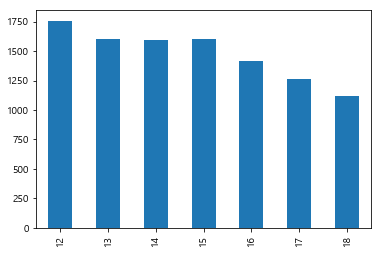

In [15]:
data['사고년_두자리'].value_counts()
data['사고년_두자리'].value_counts().sort_index()
data['사고년_두자리'].value_counts().sort_index().plot.bar()

In [16]:
df['시간'] = [-1,6,10,20, 15]
df
df.info()

,월,학생,국어,수학,윤리,시간
0,1,15,87,97,96점,-1
1,2,13,89,83,85점,6
2,3,14,78,75,83점,10
3,4,19,90,63,43점,20
4,5,10,91,66,44점,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
월     5 non-null int64
학생    5 non-null int32
국어    5 non-null int32
수학    5 non-null int32
윤리    5 non-null object
시간    5 non-null int64
dtypes: int32(3), int64(2), object(1)
memory usage: 260.0+ bytes


 ## 시간을 '새벽', '아침' 등 변경
 실수 값을 카테고리 값으로 변환

In [17]:
df['언제'] = pd.cut(df['시간'], [-2, 10, 20], labels =['새벽', '오전'])
df
df['언제'] = pd.cut(df['시간'], [-1, 10, 20], labels =['새벽', '오전'])
df

,월,학생,국어,수학,윤리,시간,언제
0,1,15,87,97,96점,-1,새벽
1,2,13,89,83,85점,6,새벽
2,3,14,78,75,83점,10,새벽
3,4,19,90,63,43점,20,오전
4,5,10,91,66,44점,15,오전


,월,학생,국어,수학,윤리,시간,언제
0,1,15,87,97,96점,-1,NaN
1,2,13,89,83,85점,6,새벽
2,3,14,78,75,83점,10,새벽
3,4,19,90,63,43점,20,오전
4,5,10,91,66,44점,15,오전


In [18]:
ages = [0, 2, 10, 21, 23, 37, 31, 61, 20, 41, 32, 100]
bins = [1, 15, 25, 35, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
cats = pd.cut(ages, bins, labels=labels)
cats

[NaN, 미성년자, 미성년자, 청년, 청년, ..., 노년, 청년, 장년, 중년, NaN]
Length: 12
Categories (5, object): [미성년자 < 청년 < 중년 < 장년 < 노년]

## 기타 함수들

In [19]:
df
df.국어.shift(1)
df.국어.shift(-1)
df.국어.diff()
df.국어.cumsum()

,월,학생,국어,수학,윤리,시간,언제
0,1,15,87,97,96점,-1,NaN
1,2,13,89,83,85점,6,새벽
2,3,14,78,75,83점,10,새벽
3,4,19,90,63,43점,20,오전
4,5,10,91,66,44점,15,오전


0     NaN
1    87.0
2    89.0
3    78.0
4    90.0
Name: 국어, dtype: float64

0    89.0
1    78.0
2    90.0
3    91.0
4     NaN
Name: 국어, dtype: float64

0     NaN
1     2.0
2   -11.0
3    12.0
4     1.0
Name: 국어, dtype: float64

0     87
1    176
2    254
3    344
4    435
Name: 국어, dtype: int32

## 사고유형별 Max 발생건 수

In [6]:
data_tmp= data.sort_values(['사고유형구분', '발생건수'], ascending=[True, False])
data_tmp.head(5)

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
3021,2014117,2013,무단횡단,111121001,서울 서울관악1,서울특별시 관악구 신림동(신림역 부근),27,31,0,19,11,1,37.484117,126.929482,"{type:Polygon,coordinates:[[[126.9318806,37.48...",2019-10-10
1593,2013114,2012,무단횡단,411339009,경기 수원서부9,경기도 수원시 팔달구 매산로1가(수원역남단교차로 부근),26,26,0,22,4,0,37.265498,127.001433,"{type:Polygon,coordinates:[[[127.0038242,37.26...",2019-10-10
3008,2014117,2013,무단횡단,111116001,서울 서울영등포1,서울특별시 영등포구 영등포동3가(선한치과 부근),24,27,0,16,8,3,37.519199,126.908637,"{type:Polygon,coordinates:[[[126.9110365,37.52...",2019-10-10
1281,2013114,2012,무단횡단,261213006,부산 부산연제6,부산광역시 연제구 연산동(연산교차로 부근),23,23,0,18,5,0,35.185305,129.082146,"{type:Polygon,coordinates:[[[129.0844755,35.18...",2019-10-10
2980,2014117,2013,무단횡단,111106001,서울 서울종로1,서울특별시 종로구 낙원동(종로2가 부근),23,29,0,17,11,1,37.570243,126.987575,"{type:Polygon,coordinates:[[[126.9899759,37.57...",2019-10-10


In [33]:
for i, j in data_tmp.groupby('사고유형구분') :
    i
    j.head(3)

'무단횡단'

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
3021,2014117,2013,무단횡단,111121001,서울 서울관악1,서울특별시 관악구 신림동(신림역 부근),27,31,0,19,11,1,37.484117,126.929482,"{type:Polygon,coordinates:[[[126.9318806,37.48...",2019-10-10
1593,2013114,2012,무단횡단,411339009,경기 수원서부9,경기도 수원시 팔달구 매산로1가(수원역남단교차로 부근),26,26,0,22,4,0,37.265498,127.001433,"{type:Polygon,coordinates:[[[127.0038242,37.26...",2019-10-10
3008,2014117,2013,무단횡단,111116001,서울 서울영등포1,서울특별시 영등포구 영등포동3가(선한치과 부근),24,27,0,16,8,3,37.519199,126.908637,"{type:Polygon,coordinates:[[[126.9110365,37.52...",2019-10-10


'보행노인'

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
8250,2018029,2017,보행노인,26230001,부산광역시 부산진구1,부산광역시 부산진구 부전동(부전상가시장 부근),18,18,0,11,6,1,35.160437,129.059249,"{type:Polygon,coordinates:[[[129.06104508,35.1...",2019-10-10
254,2013098,2012,보행노인,11230008,서울특별시 동대문구8,서울특별시 동대문구 청량리동(청량리역_일반국도6호선_진입_1 부근),16,16,0,10,5,1,37.579895,127.044103,"{type:Polygon,coordinates:[[[127.0457037,37.58...",2019-10-10
6722,2017029,2016,보행노인,11230001,서울특별시 동대문구1,서울특별시 동대문구 제기동(성바오로병원앞 부근),15,16,0,9,7,0,37.579994,127.041983,"{type:Polygon,coordinates:[[[127.0437795,37.57...",2019-10-10


'보행어린이'

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
2952,2014110,2013,보행어린이,47290001,경상북도 경산시1,경상북도 경산시 옥곡동(옥곡초등학교 부근),8,8,0,6,2,0,35.814132,128.732023,"{type:Polygon,coordinates:[[[128.7335883,35.81...",2019-10-10
4585,2015049,2014,보행어린이,11380001,서울특별시 은평구1,서울특별시 은평구 갈현동 갈현초등학교 부근,8,8,0,2,5,1,37.619428,126.916455,"{type:Polygon,coordinates:[[[126.9180565,37.62...",2019-10-10
4591,2015049,2014,보행어린이,11530001,서울특별시 구로구1,서울특별시 구로구 구로동(구로종합사회복지관 부근),8,8,0,3,5,0,37.487129,126.889816,"{type:Polygon,coordinates:[[[126.8914147,37.48...",2019-10-10


'스쿨존어린이'

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
3399,2015042,2014,스쿨존어린이,46770001,전라남도 고흥군1,전라남도 고흥군 고흥읍(고흥초교 부근),4,4,0,2,2,0,34.609485,127.288958,"{type:Polygon,coordinates:[[[127.2912708,34.61...",2019-10-10
6605,2017026,2016,스쿨존어린이,45130001,전라북도 군산시1,전라북도 군산시 수송동(군산아리울초교 부근),4,4,0,2,2,0,35.967605,126.719561,"{type:Polygon,coordinates:[[[126.72225582,35.9...",2019-10-10
8018,2018027,2017,스쿨존어린이,46110001,전라남도 목포시1,전라남도 목포시 연산동(서해초교 부근),4,4,0,1,3,0,34.810863,126.381192,"{type:Polygon,coordinates:[[[126.38388657,34.8...",2019-10-10


'자전거'

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
5749,2016147,2015,자전거,11230001,서울특별시 동대문구1,서울특별시 동대문구 용두동(마장동사거리 부근),17,18,0,4,10,4,37.572568,127.037952,"{type:Polygon,coordinates:[[[127.03974821,37.5...",2019-10-10
970,2013099,2012,자전거,27170012,대구광역시 서구12,대구광역시 서구 비산동(북비산네거리 부근),16,16,0,7,9,0,35.880587,128.571751,"{type:Polygon,coordinates:[[[128.5733172,35.88...",2019-10-10
3586,2015046,2014,자전거,11710001,서울특별시 송파구1,서울특별시 송파구 잠실동(올림픽대로-백제고분로램프(3) 부근),16,18,0,8,5,5,37.518233,127.081505,"{type:Polygon,coordinates:[[[127.0831043,37.51...",2019-10-10


## cumcount(), groupby, 그룹에서 국어 점수 max 값

In [53]:
df['그룹'] = ['a', 'b', 'b', 'a', 'a']

df= df.sort_values(['국어', '수학'], ascending=[False, True])
df
df.groupby('그룹').cumcount()
df[df.groupby('그룹').cumcount()==0]

,월,학생,국어,수학,윤리,그룹
0,1,13,97,62,76점,a
1,2,16,78,98,87점,b
3,4,10,72,84,39점,a
4,5,18,70,76,95점,a
2,3,14,70,89,69점,b


0    0
1    0
3    1
4    2
2    1
dtype: int64

,월,학생,국어,수학,윤리,그룹
0,1,13,97,62,76점,a
1,2,16,78,98,87점,b


In [7]:
data_tmp[data_tmp.groupby('사고유형구분').cumcount()==0][['사고유형구분', '발생건수']] # cumcount()로 하였기에 

,사고유형구분,발생건수
3021,무단횡단,27
8250,보행노인,18
2952,보행어린이,8
3399,스쿨존어린이,4
5749,자전거,17


In [8]:
data_tmp[data_tmp.groupby('사고유형구분').cumcount()==0]

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자
3021,2014117,2013,무단횡단,111121001,서울 서울관악1,서울특별시 관악구 신림동(신림역 부근),27,31,0,19,11,1,37.484117,126.929482,"{type:Polygon,coordinates:[[[126.9318806,37.48...",2019-10-10
8250,2018029,2017,보행노인,26230001,부산광역시 부산진구1,부산광역시 부산진구 부전동(부전상가시장 부근),18,18,0,11,6,1,35.160437,129.059249,"{type:Polygon,coordinates:[[[129.06104508,35.1...",2019-10-10
2952,2014110,2013,보행어린이,47290001,경상북도 경산시1,경상북도 경산시 옥곡동(옥곡초등학교 부근),8,8,0,6,2,0,35.814132,128.732023,"{type:Polygon,coordinates:[[[128.7335883,35.81...",2019-10-10
3399,2015042,2014,스쿨존어린이,46770001,전라남도 고흥군1,전라남도 고흥군 고흥읍(고흥초교 부근),4,4,0,2,2,0,34.609485,127.288958,"{type:Polygon,coordinates:[[[127.2912708,34.61...",2019-10-10
5749,2016147,2015,자전거,11230001,서울특별시 동대문구1,서울특별시 동대문구 용두동(마장동사거리 부근),17,18,0,4,10,4,37.572568,127.037952,"{type:Polygon,coordinates:[[[127.03974821,37.5...",2019-10-10


## Dataframe 모양바꾸기 - melt, pivot

In [63]:
df =pd.DataFrame({'A':['a', 'b', 'c'],
                  'B':[1, 2, 3],
                  'C':[4, 5, 6]})
df

,A,B,C
0,a,1,4
1,b,2,5
2,c,3,6


## 분해하기

In [64]:
df = pd.melt(df, id_vars=['A'], value_vars=['B', 'C'])
df

,A,variable,value
0,a,B,1
1,b,B,2
2,c,B,3
3,a,C,4
4,b,C,5
5,c,C,6


## 조립하기

In [65]:
df =df.pivot(index='A', columns='variable', values='value')
df
df.reset_index()

variable,B,C
A,,
a,1,4
b,2,5
c,3,6


variable,A,B,C
0,a,1,4
1,b,2,5
2,c,3,6


## Dataframe 모양바꾸기 - 삭제

## 컬럼 제거

In [68]:
data.head(3)
data.drop('경도', axis =1).head(3)

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,데이터기준일,사고년_두자리
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,10,12
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,10,12
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,10,12


,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,사고다발지역폴리곤정보,데이터기준일자,데이터기준일,사고년_두자리
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,10,12
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,10,12
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,2,0,2,0,0,37.597571,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,10,12


## 컬럼명을 특정 명기준으로 순서배열 할 떄

In [74]:
data.columns
data.columns.difference(['위도'])
data.loc[:, data.columns.difference(['위도'])].head()

Index(['사고지역관리번호', '사고년도', '사고유형구분', '위치코드', '시도시군구명', '사고지역위치명', '발생건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자', '데이터기준일', '사고년_두자리'],
      dtype='object')

Index(['경도', '경상자수', '데이터기준일', '데이터기준일자', '발생건수', '부상자수', '사고년_두자리', '사고년도',
       '사고다발지역폴리곤정보', '사고유형구분', '사고지역관리번호', '사고지역위치명', '사망자수', '사상자수',
       '시도시군구명', '위치코드', '중상자수'],
      dtype='object')

,경도,경상자수,데이터기준일,데이터기준일자,발생건수,부상자수,사고년_두자리,사고년도,사고다발지역폴리곤정보,사고유형구분,사고지역관리번호,사고지역위치명,사망자수,사상자수,시도시군구명,위치코드,중상자수
0,126.999607,1,10,2019-10-10,2,0,12,2012,"{type:Polygon,coordinates:[[[127.002009,37.590...",스쿨존어린이,2013060,서울특별시 종로구 혜화동(혜화초교 부근),0,2,서울특별시 종로구1,11110001,1
1,127.035733,1,10,2019-10-10,2,1,12,2012,"{type:Polygon,coordinates:[[[127.0381354,37.59...",스쿨존어린이,2013060,서울특별시 성북구 종암동(숭례초교 부근),0,2,서울특별시 성북구1,11290001,0
2,127.014564,0,10,2019-10-10,2,0,12,2012,"{type:Polygon,coordinates:[[[127.0169658,37.59...",스쿨존어린이,2013060,서울특별시 성북구 동소문동7가(정덕초교 부근),0,2,서울특별시 성북구2,11290002,2
3,127.059596,1,10,2019-10-10,3,0,12,2012,"{type:Polygon,coordinates:[[[127.0619982,37.61...",스쿨존어린이,2013060,서울특별시 성북구 석관동(석관초교 부근),0,3,서울특별시 성북구3,11290003,2
4,127.024430,2,10,2019-10-10,2,0,12,2012,"{type:Polygon,coordinates:[[[127.0268336,37.65...",스쿨존어린이,2013060,서울특별시 도봉구 쌍문동(쌍문초교 부근),0,2,서울특별시 도봉구1,11320001,0


## 행 , record 제거

In [77]:
data.drop(2, axis =0).head(3)

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,발생건수,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,데이터기준일,사고년_두자리
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,10,12
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,10,12
3,2013060,2012,스쿨존어린이,11290003,서울특별시 성북구3,서울특별시 성북구 석관동(석관초교 부근),3,3,0,2,1,0,37.610429,127.059596,"{type:Polygon,coordinates:[[[127.0619982,37.61...",2019-10-10,10,12


## DataFrame 모양바꾸기 - inplace

## columns에 적용

In [79]:
data.drop('발생건수', axis=1).head(3)

,사고지역관리번호,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,데이터기준일,사고년_두자리
0,2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,10,12
1,2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,10,12
2,2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,10,12


In [83]:
data.drop('발생건수', axis=1,inplace =True)

## row에 적용

In [85]:
data.dropna(how='any').shape
data.shape

(10365, 17)

(10365, 17)

## index에 적용

In [93]:
data.set_index('위치코드').head(3)
data.head(3)

,사고년도,사고유형구분,시도시군구명,사고지역위치명,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,데이터기준일,사고년_두자리
위치코드,,,,,,,,,,,,,,,
11110001,2012,스쿨존어린이,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,10,12
11290001,2012,스쿨존어린이,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,10,12
11290002,2012,스쿨존어린이,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,10,12


,사고년도,사고유형구분,위치코드,시도시군구명,사고지역위치명,사상자수,사망자수,중상자수,경상자수,부상자수,위도,경도,사고다발지역폴리곤정보,데이터기준일자,데이터기준일,사고년_두자리
사고지역관리번호,,,,,,,,,,,,,,,,
2013060,2012,스쿨존어린이,11110001,서울특별시 종로구1,서울특별시 종로구 혜화동(혜화초교 부근),2,0,1,1,0,37.588413,126.999607,"{type:Polygon,coordinates:[[[127.002009,37.590...",2019-10-10,10,12
2013060,2012,스쿨존어린이,11290001,서울특별시 성북구1,서울특별시 성북구 종암동(숭례초교 부근),2,0,0,1,1,37.595505,127.035733,"{type:Polygon,coordinates:[[[127.0381354,37.59...",2019-10-10,10,12
2013060,2012,스쿨존어린이,11290002,서울특별시 성북구2,서울특별시 성북구 동소문동7가(정덕초교 부근),2,0,2,0,0,37.597571,127.014564,"{type:Polygon,coordinates:[[[127.0169658,37.59...",2019-10-10,10,12


In [86]:
data.set_index('사고지역관리번호', inplace =True)

In [90]:
data.index
data.index.nunique()

Int64Index([2013060, 2013060, 2013060, 2013060, 2013060, 2013060, 2013060,
            2013060, 2013060, 2013060,
            ...
            2019066, 2019066, 2019066, 2019066, 2019066, 2019066, 2019066,
            2019066, 2019066, 2019066],
           dtype='int64', name='사고지역관리번호', length=10365)

35

# End 